#Implement some Libraries

In [122]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(35)  # Set the random seed


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [123]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #for checking the model accuracy
from sklearn.decomposition import PCA
from sklearn.svm import SVC


#Load the dataset

In [124]:
iris = pd.read_csv("./Iris.csv") #load the dataset

#Printing an overview about the dataset

In [125]:
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

#show the first 2 rows from the dataset

In [126]:
iris.head(2) #show the first 2 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


#checking if there is any inconsistency in the dataset

In [127]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [128]:
iris.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

#create a scatter plot for Sepal Lenght vs Width

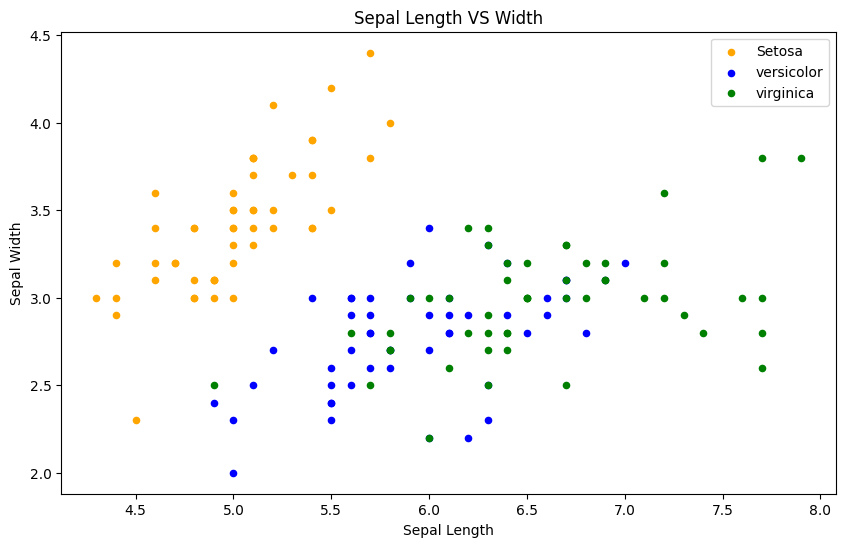

In [129]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#create a scatter plot for Petal Lenght vs Width

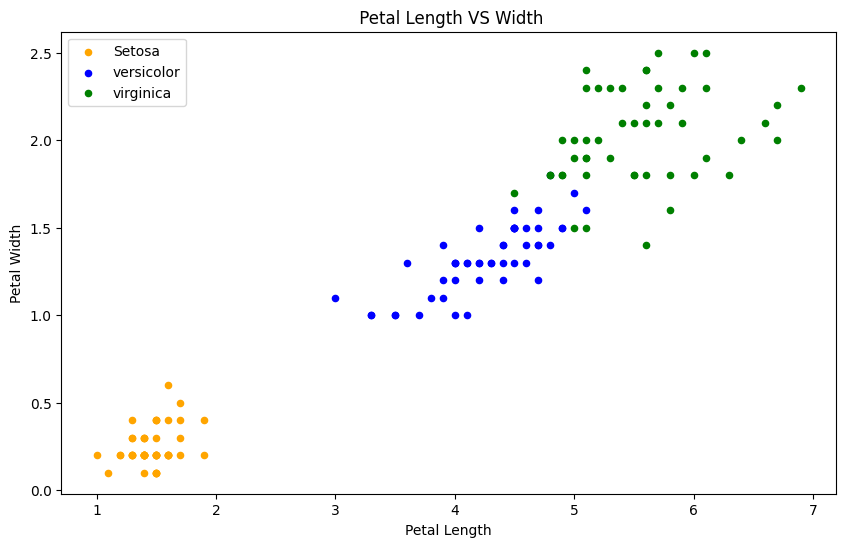

In [130]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


#displaying a violin plot of different measurements from the Iris dataset.

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

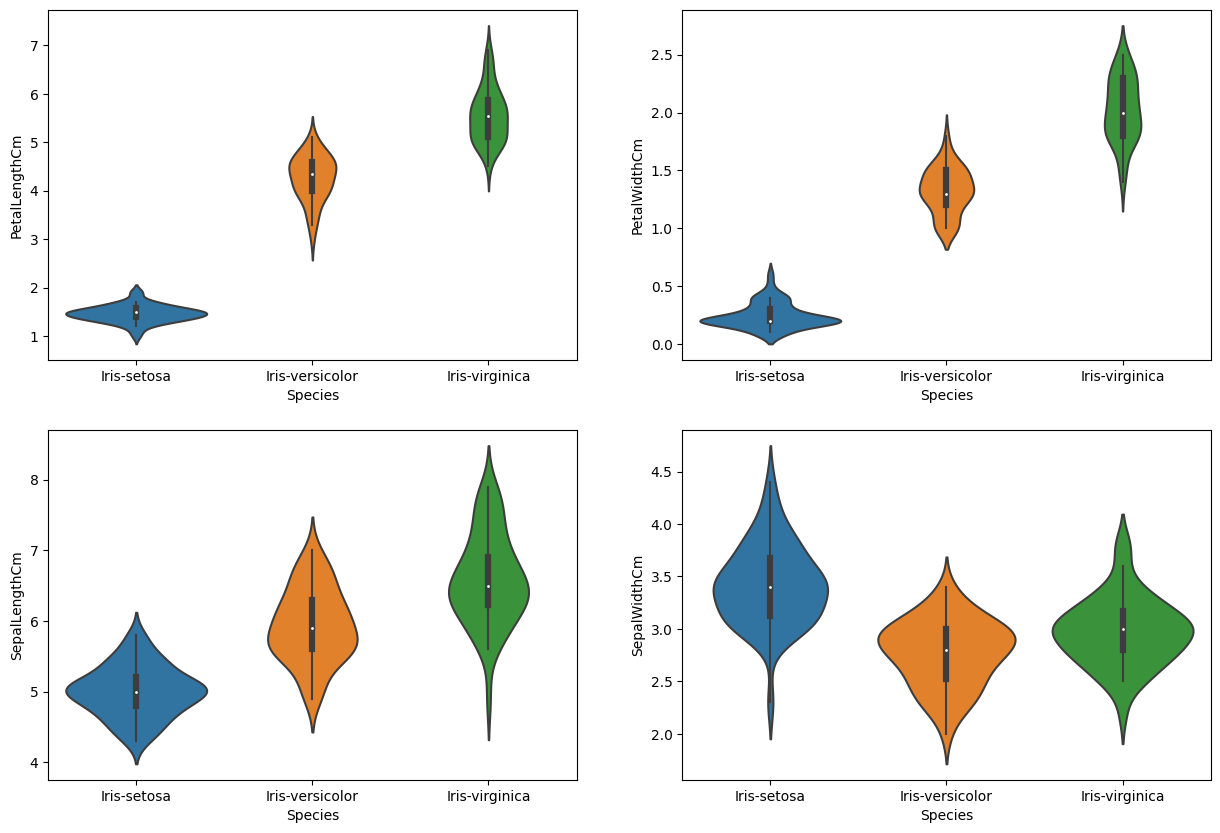

In [131]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

#get the shape of the dataset

In [132]:
iris.shape #get the shape of the dataset

(150, 5)

#create a heatmap visualization of the correlation matrix of the Iris dataset

<ipython-input-133-3c78fec58a63>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())


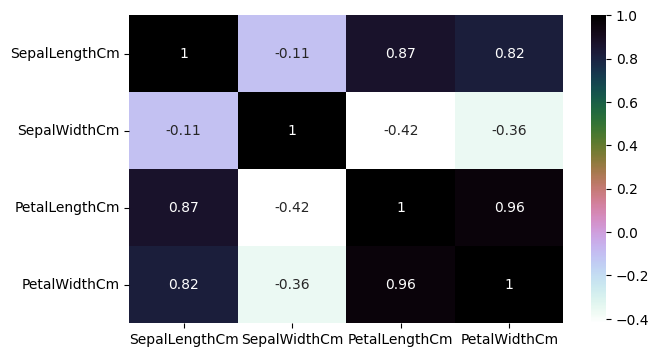

In [133]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

#splits the data into 70% and 30% ratio. train=70% and test=30%

In [134]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [135]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [136]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
110,6.5,3.2,5.1,2.0
32,5.2,4.1,1.5,0.1


In [137]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
95,5.7,3.0,4.2,1.2
61,5.9,3.0,4.2,1.5


In [138]:
train_y.head()  ##output of the training data

110     Iris-virginica
32         Iris-setosa
149     Iris-virginica
116     Iris-virginica
53     Iris-versicolor
Name: Species, dtype: object

#Naive Bayes

In [139]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a Gaussian Naive Bayes model.
model = GaussianNB()

# Train the Naive Bayes model.
model.fit(train_X, train_y)

# Predict the class labels for the test data.
predicted = model.predict(test_X)

# Calculate accuracy, precision, and recall.
accuracy = accuracy_score(test_y, predicted)
precision = precision_score(test_y, predicted, average='macro')
recall = recall_score(test_y, predicted, average='macro')

# Print the evaluation metrics.
print('Naive Bayes Model')
print('-----------------')
print('Classifier accuracy: {:.2f}%'.format(accuracy * 100))
print('Classifier precision: {:.2f}'.format(precision))
print('Classifier recall: {:.2f}'.format(recall))


Naive Bayes Model
-----------------
Classifier accuracy: 91.11%
Classifier precision: 0.91
Classifier recall: 0.91


#KNN with k=2, and calculate the accuracy, precision and recall

In [140]:
model=KNeighborsClassifier(n_neighbors=2) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))
precision = precision_score(test_y, prediction, average='weighted')
# Calculate the recall of the KNN model
recall = recall_score(test_y, prediction, average='weighted')
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

The accuracy of the KNN is 0.9111111111111111
Precision: 0.92
Recall: 0.91


#Trying a different Hyperparameter from K=1 to K=5 and calculating the accuracy, precision and recall.

<ipython-input-141-1e88e95470fb>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a_accuracy = pd.Series()
<ipython-input-141-1e88e95470fb>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a_precision = pd.Series()
<ipython-input-141-1e88e95470fb>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a_recall = pd.Series()
<ipython-input-141-1e88e95470fb>:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a_accuracy = a_accuracy.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
<ipython-input-141-1e88e95470fb>:17: FutureWarning: The series.append 

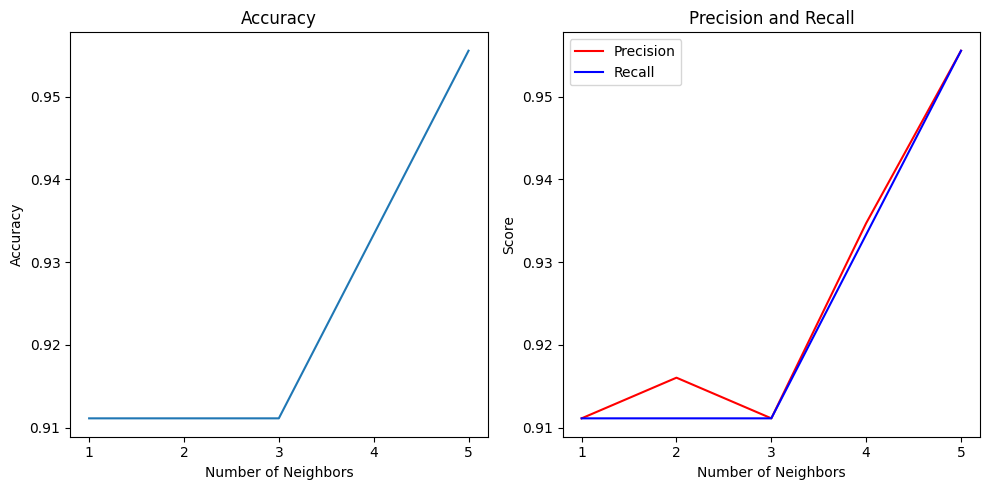

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

a_index = list(range(1, 6))
a_accuracy = pd.Series()
a_precision = pd.Series()
a_recall = pd.Series()
x = [1, 2, 3, 4, 5]

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a_accuracy = a_accuracy.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
    a_precision = a_precision.append(pd.Series(metrics.precision_score(test_y, prediction, average='weighted')))
    a_recall = a_recall.append(pd.Series(metrics.recall_score(test_y, prediction, average='weighted')))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(a_index, a_accuracy)
plt.title('Accuracy')
plt.xticks(x)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(a_index, a_precision, label='Precision', color='red')
plt.plot(a_index, a_recall, label='Recall', color='blue')
plt.title('Precision and Recall')
plt.xticks(x)
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()


#SVM (one vs one Multiclass) and calculating the accuracy

In [142]:
# Create an instance of SVM
svm_model = SVC()

# Fit the SVM model on the transformed training data
svm_model.fit(train_X, train_y)

# Predict the target variable for the transformed testing data
svm_prediction = svm_model.predict(test_X)

# Calculate the accuracy of the SVM model
svm_accuracy = metrics.accuracy_score(test_y, svm_prediction)
print('The accuracy of the SVM model is', svm_accuracy)


The accuracy of the SVM model is 0.9333333333333333


#Calculate the precision and recall for SVM

In [143]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict the target variable for the transformed testing data
svm_prediction = svm_model.predict(test_X)

# Calculate the precision of the SVM model
svm_precision = precision_score(test_y, svm_prediction, average='weighted')

# Calculate the recall of the SVM model
svm_recall = recall_score(test_y, svm_prediction, average='weighted')

print('The precision of the SVM model is', svm_precision)
print('The recall of the SVM model is', svm_recall)


The precision of the SVM model is 0.9347089947089947
The recall of the SVM model is 0.9333333333333333


# PCA for 2 components and calculating the Variance


In [144]:
# Separate the features and the target variable
X = iris.drop('Species', axis=1)
y = iris['Species']

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)


In [145]:
# Create an instance of PCA
pca = PCA(n_components=2)

# Fit and transform the training data using PCA
train_X_pca = pca.fit_transform(train_X)

# Transform the testing data using the trained PCA model
test_X_pca = pca.transform(test_X)

print(pca.explained_variance_ratio_.sum())

0.977302902984562


# KNN with PCA


In [146]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(train_X_pca, train_y)
knn_prediction = knn_model.predict(test_X_pca)
knn_accuracy = metrics.accuracy_score(test_y, knn_prediction)
print('Accuracy of KNN with PCA:', knn_accuracy)

knn_precision = metrics.precision_score(test_y, knn_prediction, average='weighted')
knn_recall = metrics.recall_score(test_y, knn_prediction, average='weighted')

print('Precision of KNN with PCA:', knn_precision)
print('Recall of KNN with PCA:', knn_recall)

Accuracy of KNN with PCA: 0.9777777777777777
Precision of KNN with PCA: 0.9790123456790124
Recall of KNN with PCA: 0.9777777777777777


#SVM with PCA

In [147]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets for PCA with KNN
train_X_pca, test_X_pca, train_y, test_y = train_test_split(X_pca, y, test_size=0.3)

# Create an instance of KNN
#knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the transformed training data
#knn_model.fit(train_X_pca, train_y)

# Predict the target variable for the transformed testing data
#knn_prediction = knn_model.predict(test_X_pca)

# Calculate the accuracy of the KNN model with PCA
#knn_accuracy = accuracy_score(test_y, knn_prediction)
#print('Accuracy of KNN with PCA:', knn_accuracy)

# Perform PCA for SVM
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets for PCA with SVM
train_X_pca, test_X_pca, train_y, test_y = train_test_split(X_pca, y, test_size=0.3)

# Create an instance of SVM
svm_model = SVC()

# Fit the SVM model on the transformed training data
svm_model.fit(train_X_pca, train_y)

# Predict the target variable for the transformed testing data
svm_prediction = svm_model.predict(test_X_pca)

# Calculate the accuracy of the SVM model with PCA
svm_accuracy = accuracy_score(test_y, svm_prediction)
print('Accuracy of SVM with PCA:', svm_accuracy)


Accuracy of SVM with PCA: 0.9777777777777777


In [148]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets for PCA with KNN
#train_X_pca, test_X_pca, train_y, test_y = train_test_split(X_pca, y, test_size=0.3)

# Create an instance of KNN
#knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the transformed training data
#knn_model.fit(train_X_pca, train_y)

# Predict the target variable for the transformed testing data
#knn_prediction = knn_model.predict(test_X_pca)

# Calculate the accuracy of the KNN model with PCA
#knn_accuracy = accuracy_score(test_y, knn_prediction)
#knn_precision = precision_score(test_y, knn_prediction, average='weighted')
#knn_recall = recall_score(test_y, knn_prediction, average='weighted')
#print('Accuracy of KNN with PCA:', knn_accuracy)
#print('Precision of KNN with PCA:', knn_precision)
#print('Recall of KNN with PCA:', knn_recall)

# Perform PCA for SVM
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets for PCA with SVM
train_X_pca, test_X_pca, train_y, test_y = train_test_split(X_pca, y, test_size=0.3)

# Create an instance of SVM
svm_model = SVC()

# Fit the SVM model on the transformed training data
svm_model.fit(train_X_pca, train_y)

# Predict the target variable for the transformed testing data
svm_prediction = svm_model.predict(test_X_pca)

# Calculate the accuracy of the SVM model with PCA
#svm_accuracy = accuracy_score(test_y, svm_prediction)
svm_precision = precision_score(test_y, svm_prediction, average='weighted')
svm_recall = recall_score(test_y, svm_prediction, average='weighted')
#print('Accuracy of SVM with PCA:', svm_accuracy)
print('Precision of SVM with PCA:', svm_precision)
print('Recall of SVM with PCA:', svm_recall)


Precision of SVM with PCA: 0.9555555555555556
Recall of SVM with PCA: 0.9555555555555556


#Creating Petals And Sepals Training Data


In [149]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [150]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [151]:
#model=svm.SVC()
#model.fit(train_x_p,train_y_p)
#prediction=model.predict(test_x_p)
#print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

#model=svm.SVC()
#model.fit(train_x_s,train_y_s)
#prediction=model.predict(test_x_s)
#print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

#calculating (accuracy, precision, recall) of petals using SVM
#calculating (accuracy, precision, recall) of speal using SVM

In [152]:
from sklearn import metrics
from sklearn import svm

# SVM model using Petals
model_petals = svm.SVC()
model_petals.fit(train_x_p, train_y_p)
prediction_petals = model_petals.predict(test_x_p)

accuracy_petals = metrics.accuracy_score(test_y_p, prediction_petals)
precision_petals = metrics.precision_score(test_y_p, prediction_petals, average='weighted')
recall_petals = metrics.recall_score(test_y_p, prediction_petals, average='weighted')

print('The accuracy of the SVM using Petals is:', accuracy_petals)
print('Precision:', precision_petals)
print('Recall:', recall_petals)

# SVM model using Sepal
model_sepal = svm.SVC()
model_sepal.fit(train_x_s, train_y_s)
prediction_sepal = model_sepal.predict(test_x_s)

accuracy_sepal = metrics.accuracy_score(test_y_s, prediction_sepal)
precision_sepal = metrics.precision_score(test_y_s, prediction_sepal, average='weighted')
recall_sepal = metrics.recall_score(test_y_s, prediction_sepal, average='weighted')

print('The accuracy of the SVM using Sepal is:', accuracy_sepal)
print('Precision:', precision_sepal)
print('Recall:', recall_sepal)


The accuracy of the SVM using Petals is: 0.9777777777777777
Precision: 0.9796296296296295
Recall: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8
Precision: 0.8040305010893246
Recall: 0.8


In [153]:
#model=KNeighborsClassifier(n_neighbors=3)
#model.fit(train_x_p,train_y_p)
#prediction=model.predict(test_x_p)
#print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

#model.fit(train_x_s,train_y_s)
#prediction=model.predict(test_x_s)
#print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

#calculating (accuracy, precision, recall) of petals using KNN
#calculating (accuracy, precision, recall) of sepal using KNN

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# KNN model using Petals
model_petals = KNeighborsClassifier(n_neighbors=3)
model_petals.fit(train_x_p, train_y_p)
prediction_petals = model_petals.predict(test_x_p)

accuracy_petals = metrics.accuracy_score(test_y_p, prediction_petals)
precision_petals = metrics.precision_score(test_y_p, prediction_petals, average='weighted')
recall_petals = metrics.recall_score(test_y_p, prediction_petals, average='weighted')

print('The accuracy of the KNN using Petals is:', accuracy_petals)
print('Precision:', precision_petals)
print('Recall:', recall_petals)

# KNN model using Sepals
model_sepal = KNeighborsClassifier(n_neighbors=3)
model_sepal.fit(train_x_s, train_y_s)
prediction_sepal = model_sepal.predict(test_x_s)

accuracy_sepal = metrics.accuracy_score(test_y_s, prediction_sepal)
precision_sepal = metrics.precision_score(test_y_s, prediction_sepal, average='weighted')
recall_sepal = metrics.recall_score(test_y_s, prediction_sepal, average='weighted')

print('The accuracy of the KNN using Sepals is:', accuracy_sepal)
print('Precision:', precision_sepal)
print('Recall:', recall_sepal)


The accuracy of the KNN using Petals is: 0.9777777777777777
Precision: 0.9796296296296295
Recall: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333
Precision: 0.7705882352941177
Recall: 0.7333333333333333
